# Practical session 3 - Brownian motion, Fourier transform

Students (pair):
- [BENICHOU Yaniv](https://github.com/benech17)
- [BONNEFOY Nicolas](https://github.com/Nicolas-Bonnefoy)

```
conda create --name=lab3 --file=requirement.txt
conda activate lab3
# do not forget to deactivate the environment if needed
# you can remove the environment once you are done
conda env remove --name=lab3
```

In [1]:
%load_ext autoreload
%autoreload 2

# Finding $W^*$ :

Correction (**here $W_{n-1}$ takes the place of $\vec{A}$ and $\vec{B}$ the place of $W_{n}$**):

Let $n \in \mathbb{N}^{\star}$ such that $W_n$ is out of $\mathcal{B}(\mathbf{0}, 1)$.  The intersection $W^*$ of the line segment $[W_{n-1}, W_{n}]$ with $\mathcal{B}(\mathbf{0}, 1)$ thus verifies

$$
    \begin{cases}
        W^{\star} &= \alpha W_{n-1} + (1-\alpha) W_{n},~ \alpha \in [0, 1] \\
        \Vert W^{\star} \Vert_2 &= 1,
    \end{cases}
$$

> Recall:
> - The Euclidean norm ($l^2$-norm) of $W^{\star}$ is computed as $\sqrt{\langle W^{\star}, W^{\star} \rangle}$ which is equal to $({W^{\star}}^{T}  W^{\star})^{\frac{1}{2}}$ where ${W^{\star}}^{T}  W^*= \Vert W^{\star} \Vert^2$. Finally, **${W^{\star}}^{T}  W^{\star} = 1$**. 
> - $(\mathbf{v}+ \mathbf{w})^T(\mathbf{v}+ \mathbf{w})=(\mathbf{v}^T+ \mathbf{w}^T)(\mathbf{v}+ \mathbf{w})$ which is equal to $\mathbf{v}^T\mathbf{v}+\mathbf{v}^T\mathbf{w}+\mathbf{w}^T\mathbf{v} + \mathbf{w}^T \mathbf{w}$. From the fact that $\mathbf{v}^T\mathbf{w}=\mathbf{w}^T\mathbf{v}$ we get the final expression $$(\mathbf{v}+ \mathbf{w})^T(\mathbf{v}+ \mathbf{w})=\mathbf{v}^T\mathbf{v}+2\mathbf{v}^T\mathbf{w}+\mathbf{w}^T \mathbf{w}$$

Let us consider that $\mathbf{v}= \alpha (W_{n-1}- W_{n})$ and $\mathbf{w}= W_{n}$. Then, 

$$\alpha^{2} (W_{n-1}- W_{n})^{T} (W_{n-1}- W_{n})+ 2\alpha (W_{n-1}- W_{n})^{T} W_{n} + W_{n}^{T} W_{n} = 1$$

resulting in the following 2nd order polynomial equation in $\alpha$:

$$
    p(\alpha) = \alpha^2 \Vert W_{n-1} - W_n \Vert^2  + 2\alpha \langle W_{n-1} - W_n, W_n \rangle + \Vert W_{n}\Vert^2 - 1 = 0,~ \text{for } \alpha \in [0,1].
$$

> Hint: 
> - $p(\alpha) = c_2\alpha^2+ c_1 \alpha + c_0$
> - $\Delta = c_1^2-4c_2c_0 $
> - $c_2= \Vert W_{n-1} - W_n \Vert^2$, $c_1=2\langle W_{n-1} - W_n, W_n \rangle$, $c_0=\Vert W_{n}\Vert^2-1$
> - $\alpha^* = \frac{-c_1 \pm \sqrt{\Delta}}{2c_2}$

Thus,

$$
    \Delta = 4 \big[ \langle W_{n-1} - W_n, W_n \rangle^2 + \Vert W_n- W_{n-1} \Vert^2 \underbrace{(1-\Vert W_{n}\Vert^2)}_{>0} \big], $$

 Then   
    
  $$\alpha^* = \frac{- 2 \langle W_{n-1} - W_n, W_n \rangle \pm \sqrt{\Delta}}{2 \Vert W_{n-1} - W_n \Vert^2}$$

  which results in $\alpha^* = \frac{- \langle W_{n-1} - W_n, W_n \rangle \pm \sqrt{\langle W_{n-1} - W_n, W_n \rangle^2 + \Vert W_{n-1} - W_n\Vert^2 (1-\Vert W_{n}\Vert^2)}}{\Vert W_n- W_{n-1} \Vert^2}$

and $W^* = \alpha^* W_{n-1} + (1-\alpha^*) W_{n}$.


## <a name="ex1">Exercise 1: Brownian motion</a>

This first exercise consists in generating a Brownian motion on the closed unit ball $\mathcal{B}(\mathbf{0}, 1) = \{ \mathbf{x} \mid \Vert \mathbf{x} \Vert  \leq 1\}$, focusing first on the 2-D case. The Brownian motion is a random walk with independent, identically distributed Gaussian increments, appearing for instance in thermodynamics and statistical mechanics (to model the evolution of a large particle in a medium composed of a large number of small particles, ...). It is also connected to the diffusion process (Einstein).

Let $N \in \mathbb{N}^*$, $\delta > 0$, and $\mathbf{x} = (x_1, x_2) \in  \mathcal{B}(\mathbf{0}, 1)$. The first $N$ steps of a 2-D discrete-time Brownian motion $W$ can be generated as follows

\begin{align*}
    W_0 &= \mathbf{x}, \\
    %
    (\forall n \in \{1, \dotsc, N-1 \}), \quad W_n &= W_{n−1} + \sqrt{\delta} G_n, \quad G_n \sim \mathcal{N}(\mathbf{0}, \mathbf{I}),
\end{align*}

where $\mathcal{N}(\mathbf{0}, \mathbf{I})$ is a Gaussian distribution with mean $\mathbf{0}$ and identity covariance matrix.

1. Define a random generator `rng`, set to a known state for reproducibility (see session 2).

**Answer:**

In [2]:
import numpy as np
generator=np.random.RandomState(42)

2. Implement a function `brownian_motion(niter, x, step, rng)` which

    - simulates $W$ until it reaches the boundary of $\mathcal{B}(\mathbf{0}, 1)$, using a maximum of $N$ iterations (`niter`), a starting point $\mathbf{x} \in \mathcal{B}(\mathbf{0}, 1)$ (`x`) and step-size $\delta$ (`step`);
    - interpolates linearly between the two last positions to determine the points $W^*$ where the trajectory crosses the boundary (if applicable);
    - returns both the whole random walk $W$ and, if appropriate, the point at the intersection between the last segment of the trajectory and $\mathcal{B}(\mathbf{0}, 1)$.
 
> Hint: 
> - you can easily derive a closed form expression for $W^*$, observing that $\Vert W^* \Vert^2= 1$ and $W^* \in [W_{n-1}, W_n]$. 
> - you can also take a look at [`np.roots`](https://numpy.org/doc/stable/reference/generated/numpy.roots.html?highlight=roots#numpy.roots) if needed.

> Recall of the Linear Interpolation (LERP) for $n$-dimensional vectors:
> - Clearly, $\vec{D}=\alpha \vec{C}$ with $\alpha \in [0, 1]$ and hence $\vec{P}-\vec{B}= \alpha (\vec{A}-\vec{B})$ which is equivalent to $\vec{P}= (1-\alpha) \vec{B} + \alpha \vec{A}$. 
![alternatvie text](img/for_Course.png)

**Answer:**

In [3]:
def brownian_motion(niter,x,step,rng):
    w=x
    np.random.RandomState=rng
    norm=np.sqrt((w[0])**2+(w[1])**2)
    assert norm<1 
    iter=0
    W=[w]
    while norm<1 and iter<niter:
        w=w+[np.random.normal(0,1)*np.sqrt(step),np.random.normal(0,1)*np.sqrt(step)]
        norm=np.sqrt(w[0]**2+w[1]**2)
        iter+=1
        W.append(w)
    if norm<1:
        return W,None
    else:
        
        w1=W[-2]
        w2=W[-1]
        diff=w1-w2
        norm_diff=np.sqrt(diff[0]**2+diff[1]**2)
        delta=1/(norm_diff**2)*np.sqrt((diff[0]*w2[0]+diff[1]*w2[1])**2+norm_diff**2*(1-norm_diff**2))
        alpha_star1=-1/(norm_diff**2)*((diff[0]*w2[0]+diff[1]*w2[1]))-delta
        alpha_star2=-1/(norm_diff**2)*((diff[0]*w2[0]+diff[1]*w2[1]))+delta
        w_star1=0
        w_star2=0
        print(alpha_star1,alpha_star2)
        if alpha_star1>=0 and alpha_star1<=1:
            w_star1=alpha_star1*w1+(1-alpha_star1)*w2
        if alpha_star2>=0 and alpha_star2<=1:
            w_star2=alpha_star2*w1+(1-alpha_star2)*w2

        if w_star1==0 and w_star2==0:
            return W,None
        elif w_star1==0:
            return W,w_star2
        elif w_star2==0:
            return W,w_star1
        else:
            return W,[w_star1,w_star2]
        

W,l=brownian_motion(1000,np.array([0.2,0.4]),0.01,generator)
print(W)
print(l)


        
    

-3.024912109559814 14.17161199139061
[array([0.2, 0.4]), array([0.22686018, 0.41313225]), array([0.21900057, 0.3251737 ]), array([0.29819171, 0.3120931 ]), array([0.32521966, 0.32075311]), array([0.20186308, 0.26937803]), array([0.18095799, 0.27251684]), array([0.16945475, 0.29062837]), array([0.25315924, 0.27908254]), array([0.29690477, 0.28404415]), array([0.39381764, 0.23109824]), array([0.40364387, 0.24279885]), array([0.2163807 , 0.16006248]), array([0.28845481, 0.00882976]), array([0.36797512, 0.00638476]), array([ 0.2444463 , -0.11319247]), array([0.32545073, 0.10484348]), array([0.47413578, 0.1880764 ]), array([0.45057786, 0.12882211]), array([0.38151454, 0.07038651]), array([0.35689433, 0.18134442]), array([0.42249435, 0.06557088]), array([0.27476489, 0.10166624]), array([0.16998734, 0.1183588 ]), array([0.38581726, 0.21641145]), array([0.31632136, 0.25192218]), array([0.10218045, 0.18994331]), array([0.05967079, 0.31542254]), array([0.17983396, 0.2876778 ]), array([0.37558998

3. Diplay the trajectory of a Brownian motion starting from $\mathbf{x} = (0.2, 0.4)$, using $\delta = 10^{-2}$, $N = 1000$. Display the unit circle on the same figure, and highlight the intersection with the boundary of the domain (whenever it exists).

> Hint: to draw the unit disk, you can use for instance:
> ```python
> circle = plt.Circle((0,0), 1)
> fig, ax = plt.subplots()
> plt.xlim(-1.25,1.25)
> plt.ylim(-1.25,1.25)
> plt.grid(linestyle = "--", zorder = 1)
> ax.set_aspect(1)
> ax.add_artist(circle)
> ```

**Answer:**

-3.1461589033341095 16.477003115934032
[array([0.2, 0.4]), array([0.27506931, 0.43397934]), array([0.3969484 , 0.34018298]), array([0.41016558, 0.31867699]), array([0.46010214, 0.32492207]), array([0.48106377, 0.31144925]), array([0.44382291, 0.35167093]), array([0.27383712, 0.27695145]), array([0.26088196, 0.31068057]), array([0.20891934, 0.28688865]), array([0.1465139 , 0.25851214]), array([-0.10170127,  0.25196681]), array([-0.09487955,  0.32320749]), array([-0.21341957,  0.35085024]), array([-0.3194101 ,  0.34199369]), array([-0.48645555,  0.21277169]), array([-0.42765391,  0.06392008]), array([-0.42614018,  0.11757547]), array([-0.55977212,  0.12968361]), array([-0.68390276,  0.0389641 ]), array([-0.71957182,  0.03651123]), array([-0.77808697, -0.19737705]), array([-0.78363188, -0.08235897]), array([-0.62343954, -0.10760124]), array([-0.70205951, -0.06604987]), array([-0.64229774, -0.18863292]), array([-0.65137136, -0.21008961]), array([-0.68021804, -0.17730013]), array([-0.690306

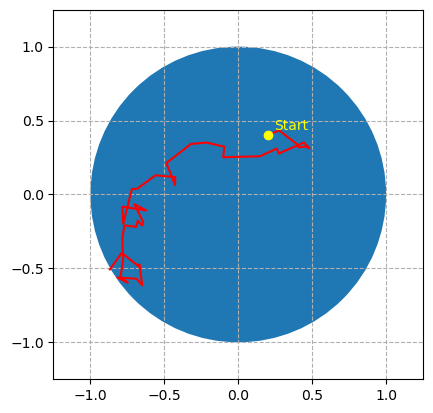

In [4]:
W,l=brownian_motion(1000,np.array([0.2,0.4]),0.01,generator)
print(W)
import matplotlib.pyplot as plt
x=[]
y=[]
for i in range(len(W)):
    x.append(W[i][0])
    y.append(W[i][1])

circle = plt.Circle((0,0), 1)
fig, ax = plt.subplots()
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.grid(linestyle = "--", zorder = 1)
ax.set_aspect(1)
ax.add_artist(circle)
if l!=None:
    ax.plot(l[0,0],l[0,1], color = "green", marker = "o", zorder = 2)
    ax.annotate("Intersection", (l[0,0],l[0,1]), xytext = (l[0,0]+0.1,l[0,1]+0.1),color="green")
ax.plot(x,y, color = "red", zorder = 2)
ax.plot(x[0],y[0], color = "yellow", marker = "o", zorder = 2)
ax.annotate("Start", (x[0],y[0]), xytext = (x[0]+0.04,y[0]+0.04),color="yellow")

plt.show()

4. Represent, on the same figure, 4 other trajectories of $W$ with the same parameters.

**Answer:**

-12.344256933341846 61.17618822345151
[array([0.2, 0.4]), array([0.18804267, 0.38398696]), array([0.18564514, 0.43302551]), array([0.14996407, 0.18982697]), array([0.3887079 , 0.46173131]), array([0.37379127, 0.35990919]), array([0.34834734, 0.38307189]), array([0.30261447, 0.41545663]), array([0.31335438, 0.45056969]), array([0.43189503, 0.47969667]), array([0.49113075, 0.45774738]), array([0.56572999, 0.31939502]), array([0.41830973, 0.10832772]), array([ 0.37261669, -0.02171438]), array([ 0.45500741, -0.02582868]), array([ 0.41221379, -0.07722877]), array([ 0.29706239, -0.09558898]), array([0.34575004, 0.00931139]), array([0.41924414, 0.17445986]), array([0.29919417, 0.10373693]), array([0.24879368, 0.13627965]), array([0.36128185, 0.17797512]), array([0.23503624, 0.18295895]), array([0.27184488, 0.11856451]), array([ 0.31926626, -0.02454522]), array([0.29912131, 0.16302666]), array([0.47723702, 0.1677871 ]), array([0.43170773, 0.17631277]), array([0.38198938, 0.13959655]), array([0

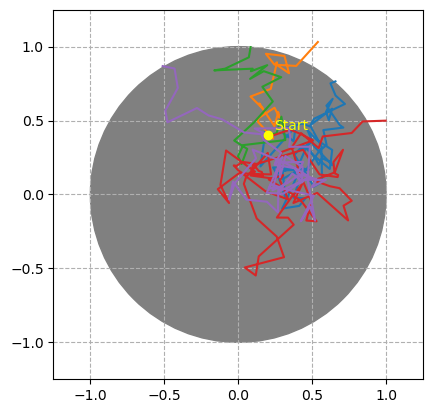

In [5]:

circle = plt.Circle((0,0), 1, color = "grey")
fig, ax = plt.subplots()
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.grid(linestyle = "--", zorder = 1)
ax.set_aspect(1)
ax.add_artist(circle)


for k in range(5):
    W,l=brownian_motion(1000,np.array([0.2,0.4]),0.01,generator)
    print(W)
    import matplotlib.pyplot as plt
    x=[]
    y=[]
    for i in range(len(W)):
        x.append(W[i][0])
        y.append(W[i][1])
    if l!=None:
        ax.plot(l[0,0],l[0,1], color = "green", marker = "o", zorder = 2)
        ax.annotate("Intersection" +str(k+1), (l[0,0],l[0,1]), xytext = (l[0,0]+0.1,l[0,1]+0.1),color="green")
    ax.plot(x,y, zorder = 2)
ax.plot(x[0],y[0], color = "yellow", marker = "o", zorder = 2)
ax.annotate("Start", (x[0],y[0]), xytext = (x[0]+0.04,y[0]+0.04),color="yellow")

plt.show()

5. [Bonus] Generalize the procedure to a $M$-dimensional Brownian motion, $M > 2$.

**Answer:**

In [6]:
# your code

---
## <a name="ex2">Exercise 2: 2D Fourier transform, ideal low-pass filter and linear convolution</a>

In this exercise, we explore the use of the 2-dimensional Fourier transform to filter an image, and convolve it with a blurring kernel.

1\. Load and display one of the images contained in the `img/` folder. The image will be denoted by $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ in the rest of this exercise.

**Answer:**

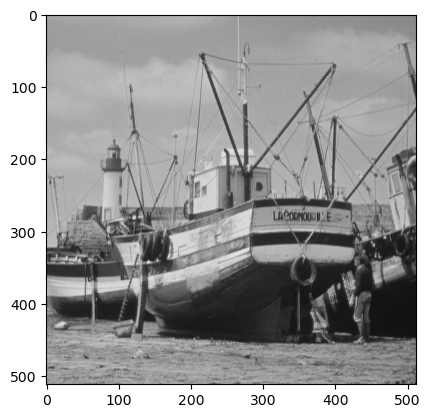

In [7]:
#load image from img folder
import cv2
import matplotlib.pyplot as plt
img=cv2.imread('img/boat.png')
plt.imshow(img)

2\. Let $\mathcal{F}$ denote the 2D discrete Fourier transform. Compute $|\mathcal{F}(\mathbf{X})|^2$, the spectrum of the image $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ (i.e., the term-wise squared absolute value of its Fourier transform) loaded in 1. Display the result in logarithmic scale.

a) In this representation, where is the pixel of the spectrum associated with the null frequency located?
    
b) Take a look at the documentation of `np.fft.fftshift`. Use it to ensure that the null frequency is located at the center of the image. 

**Answer:**

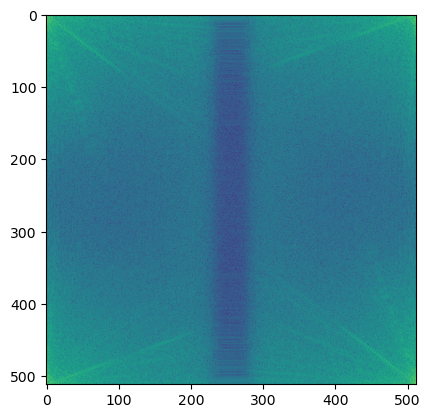

In [8]:
#convert img to grey
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#do the fourier transofrm of img
img_f=np.fft.fft2(img)
#get the term-wise square of the absolute value 
img_f2=np.abs(img_f)**2
#dispaly on logarithmic scale
plt.imshow(np.log(img_f2))


#à regarder: utilise matplotlib.colors y a un argument lognorm pour etre plus propre


3\. 
    a) Create a function `ideal_lowpass_filter` to filter $\mathbf{X}$ by an ideal low-pass filter. The filter preserves Fourier coefficients associated to frequencies below a cutoff specified in each direction ($\mathbf{f}_c = (f_{c,y}, f_{c,x})$), and sets others to zero. For simplicity, $f_{c,y}$ and $f_{c,x}$ can be expressed as a number of samples to be kept along each dimension (e.g., $\mathbf{f}_c = (50,50)$).

b) Display the filtered image for 2 different values of $\mathbf{f}_c$. What do you observe as the cutoff frequencies increase?
    
> Warning: beware the type of the array after `np.fft.fft2`, do not hesitate to specify the type if you make copies from this array
> ```python
> a = np.zeros((2,2), dtype=np.complex)
> ...
> ```

**Answer:**

In [9]:
# your code

4\. Let $\mathbf{H} \in \mathbb{R}^{M_2\times N_2}$ be a 2-D Gaussian kernel, obtained as the outer product of two 1-D Gaussian windows $\mathbf{w}_y \in \mathbb{R}^{M_2}$ and $\mathbf{w}_x \in \mathbb{R}^{N_2}$, of standard deviation $\sigma_y = 10$ and $\sigma_x = 10$, respectively:

\begin{equation}
    \mathbf{H} = \mathbf{w}_y \mathbf{w}_x^T.
\end{equation}

Let $M = M_1+M_2-1$ and $N =  N_1+N_2-1$. From the discrete convolution theorem, the linear convolution between $\mathbf{H}$ and $\mathbf{X}$ can be computed as follows

\begin{equation}
    \mathbf{X} \star \mathbf{H} = \mathcal{F}^{-1} \Big( \mathcal{F}\big(P_1(\mathbf{X})\big) \odot \mathcal{F}\big(P_2(\mathbf{H})\big) \Big) \in \mathbb{R}^{M\times N},
\end{equation}

where $P_i: \mathbb{R}^{M_i \times N_i} \rightarrow \mathbb{R}^{M \times N}$, $i \in \{1, 2\}$, are 0-padding operators, $\odot$ is the Hadamard (= term-wise) product, $\mathcal{F}^{-1}$ is the 2D discrete inverse Fourier transform.

Compute and display $\mathbf{X} \star \mathbf{H}$, for $M_2 = N_2 = 10$. What do you observe?

> Hint: 
> - the usual 0-padding procedure in image space consists in appending trailing zeros. For instance (in 1D), 0-padding a vector $\mathbf{x} \in \mathbb{R}^N_1$ to the size $N>N_1$ corresponds to creating the vector
\begin{bmatrix}
\mathbf{x} \\
\mathbf{0}_{N-N_1}
\end{bmatrix}
> - since the input images are real, $\mathcal{F}(\mathbf{x})$ and $\mathcal{F}(\mathbf{h})$ are Hermitian symmetric. In this case, a more efficient version of `np.fft.fft2` can be used, computing only quarter of the Fourier coefficients (half of the Fourier coefficients in each direction): [`np.fft.rfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft2.html?highlight=rfft#numpy.fft.rfft2). Its inverse, [`np.fft.irfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.irfft2.html#numpy.fft.irfft2), also ensures that the output is real;
> - the 2D Gaussian window can be generated as the outer product of two 1D Gaussian windows (one window for each dimension);
> - you can take a look at [scipy.signal.windows.gaussian](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.gaussian.html#scipy.signal.windows.gaussian) and [np.newaxis](https://numpy.org/doc/stable/reference/constants.html?highlight=newaxis#numpy.newaxis) (or `np.reshape` or built-in `np.outer`).

**Answer:**

In [10]:
# your code